In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from PIL import Image
import os, glob
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/scissor"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [25]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/rock"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [32]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/paper"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [27]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/"
(x, y)=load_data(image_dir_path)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state = 10)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (240, 28, 28, 3)
y_train shape: (240,)
x_train shape: (60, 28, 28, 3)
y_train shape: (60,)


라벨:  0


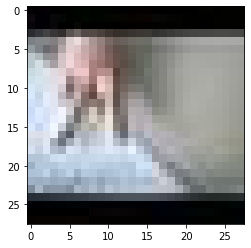

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [29]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

model.summary()

Epoch 1/10
8/8 [==============================] - 1s 19ms/step - loss: 1.0352 - accuracy: 0.4750
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 0.8561 - accuracy: 0.9208
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 0.6121 - accuracy: 0.8667
Epoch 4/10
8/8 [==============================] - 0s 19ms/step - loss: 0.3822 - accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 0.2554 - accuracy: 0.9458
Epoch 6/10
8/8 [==============================] - 0s 19ms/step - loss: 0.1990 - accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 19ms/step - loss: 0.1503 - accuracy: 0.9500
Epoch 8/10
8/8 [==============================] - 0s 18ms/step - loss: 0.1201 - accuracy: 0.9708
Epoch 9/10
8/8 [==============================] - 0s 21ms/step - loss: 0.1184 - accuracy: 0.9708
Epoch 10/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0918 - accuracy: 0.9708
Model: "sequential_7"
_______

In [30]:
#모델 시험
x_test_norm = x_test/255.0
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

2/2 - 0s - loss: 0.0932 - accuracy: 0.9667
test_loss: 0.093229278922081 
test_accuracy: 0.9666666388511658


In [31]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0
